In [1]:
# env: CASIA2024-final

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from functions.EM_poisson_nmf import EM_poisson_nmf

Load data

NIPS 1–17 data contains distribution of words in all NIPS papers from 1988 to 2003.The raw data can be downloaded [here](https://ai.stanford.edu/~gal/data.html). NIPS 1–17 data prepared by the author for subsequent topic modeling analyses can be downloaded [here](https://stephenslab.github.io/fastTopics-experiments/prepare_nips_data.html).

In [4]:
df = pd.read_csv('../data/nips.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2483 entries, 1987/0001 to 2003/VM15
Columns: 14036 entries, aaa to zxt
dtypes: int64(14036)
memory usage: 265.9+ MB


In [5]:
df.head()

,aaa,aaai,aat,abalone,abandon,abandoned,abbott,abbreviate,abbreviated,abc,...,zones,zontal,zoo,zoom,zornetzer,zoubin,zucker,zur,zurich,zxt
1987/0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987/0009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987/0022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987/0031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987/0041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# calculate the non-zero ratio
df.astype(bool).sum().sum() / df.size

np.float64(0.03742858103671509)

In [7]:
X = df.values

In [8]:
K = 10
max_iter = 300
random_seed = 0

Fit the model

In [9]:
model = EM_poisson_nmf()
L, F, loglikelihood = model.fit(X, K, max_iter, random_seed)

Plot the loglikelihood curve.

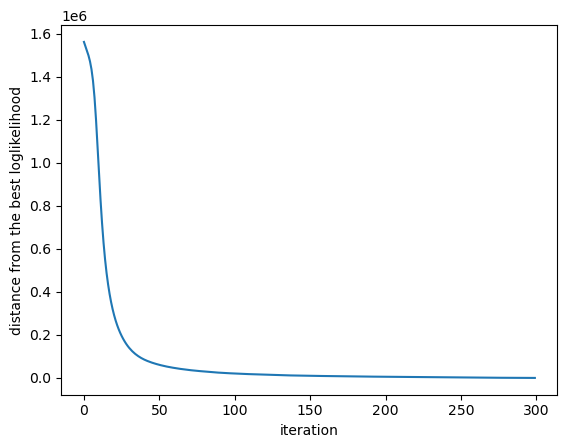

In [10]:
plt.figure()
plt.plot(loglikelihood[-1] - loglikelihood)
plt.xlabel('iteration')
plt.ylabel('distance from the best loglikelihood')
# plt.title('loglikelihood vs iteration')
plt.show()

Plot the Document-Topic proportion plot and classify the documents by year. We can be observed that the change in topic proportions is associated with the year.

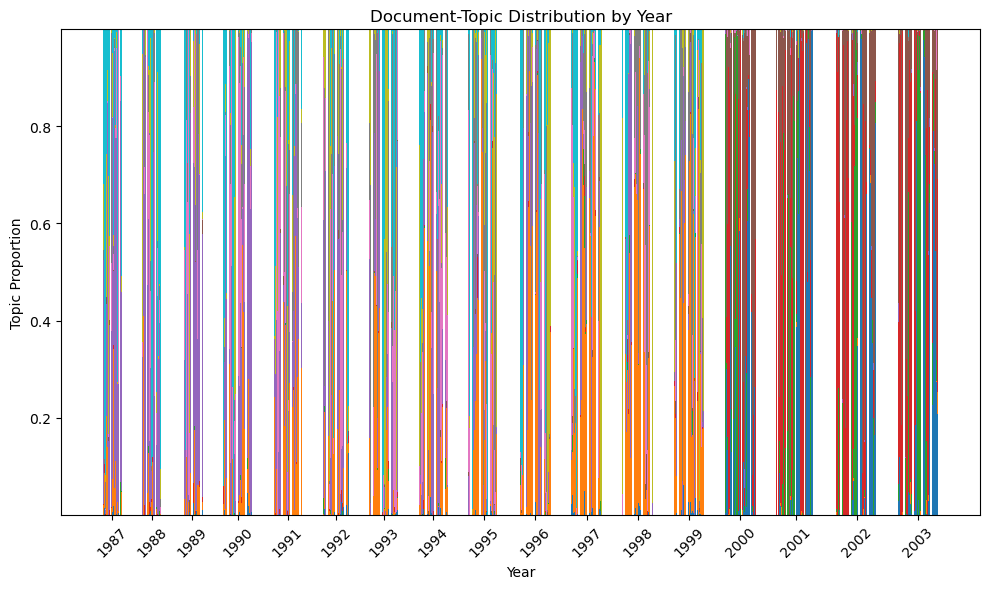

In [11]:
# Extract year information as the grouping basis
df['Year'] = df.index.str.split('/').str[0]

# Get all unique years
years = df['Year'].unique()

# Set colors, ensuring each topic uses a consistent color
colors = plt.cm.tab10.colors

# Set the figure size
plt.figure(figsize=(10, 6))

# Initialize x-axis positions
x_pos = np.arange(L.shape[0])  # Original x positions
bottom = np.zeros(L.shape[0])  # Initialize the bottom positions for stacked bars

# Record the starting position of each year's bar group
year_positions = []
current_position = 0

# Draw grouped bar charts by year
for year in years:
    # Get the indices of the current year
    year_indices = df[df['Year'] == year].index
    year_data = L[df.index.isin(year_indices), :]
    
    # Record the center position of the current year's bar group
    year_positions.append(current_position + year_data.shape[0] / 2)
    
    # Draw stacked bars for the current year
    bottom_group = np.zeros(year_data.shape[0])
    for k in range(K):
        plt.bar(range(current_position, current_position + year_data.shape[0]), 
                year_data[:, k], 
                bottom=bottom_group, 
                color=colors[k], 
                label=f'Topic {k+1}' if current_position == 0 else "")
        bottom_group += year_data[:, k]  # Update the bottom position for the next topic
    
    # Update the starting position for the next year's bars
    current_position += year_data.shape[0] + 100  # Leave space between groups

# Set x-axis labels
plt.xticks(year_positions, years, rotation=45)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Topic Proportion')
plt.title('Document-Topic Distribution by Year')

# Display legend
# plt.legend(title='Topics')

# Show the plot
plt.tight_layout()
plt.show()

Find the ten words most related to a word.

In [12]:
index_want = df.columns.get_loc('father')
dist_want = np.linalg.norm(F - F[index_want], axis=1, ord=2)
index_closest = np.argsort(dist_want)[:10]
df_closest = df.columns[index_closest]
df_closest

Index(['father', 'apprentissage', 'prod', 'accesses', 'sped', 'judiciously',
       'timetlon', 'algorith', 'reprint', 'matfix'],
      dtype='object')